# Phase 3 – Optimisation du drone par Chinese Postman
Ce notebook démontre l’algorithme Chinese Postman appliqué au réseau routier :
1. Chargement d’un graphe picklé (secteur ou mini‑secteur).
2. Calcul de la tournée minimale (`chinese_postman`).
3. Affichage de la distance et du tracé.
4. Boucle récapitulative sur tous les secteurs disponibles.

In [4]:
from pathlib import Path
import pickle, networkx as nx, osmnx as ox
from drone.model import chinese_postman

GRAPH_DIR = Path('../data/processed')
FIG_DIR   = Path('../data/figures')
FIG_DIR.mkdir(parents=True, exist_ok=True)


## 1. Démo sur un secteur unique

Distance : 102.16 km, Nœuds : 447, Arêtes : 1101


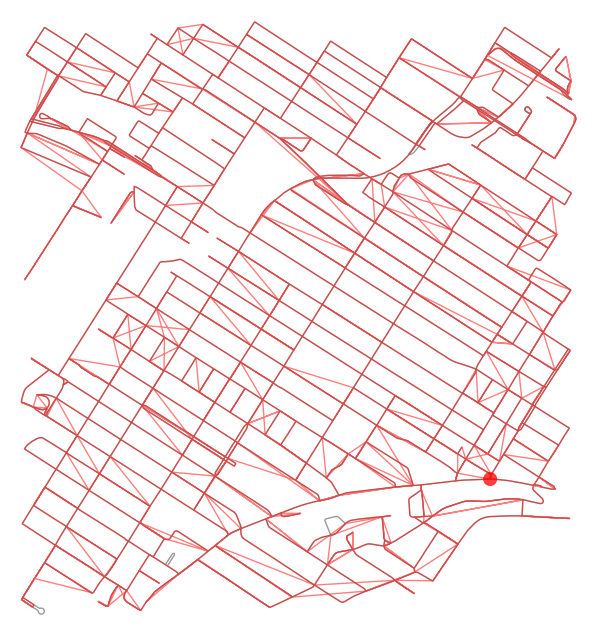

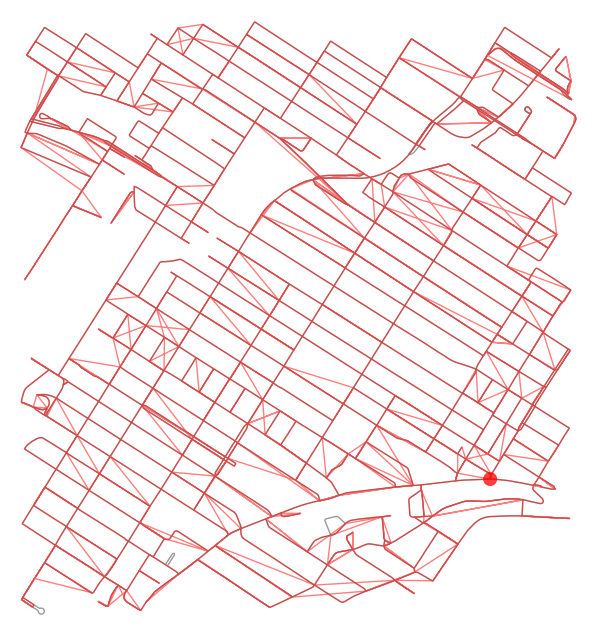

In [5]:
graph_file = GRAPH_DIR / 'graph_sector_Outremont.pkl' 
with open(graph_file, 'rb') as f:
    G = pickle.load(f)

nodes_path, dist = chinese_postman(G)
print(f"Distance : {dist/1000:.2f} km, Nœuds : {G.number_of_nodes()}, Arêtes : {G.number_of_edges()}")

fig, ax = ox.plot_graph_route(G.to_undirected(), nodes_path,
                              node_size=0, bgcolor='white',
                              route_color='red', route_linewidth=1)
fig

## 2. Distances pour tous les secteurs picklés

In [ ]:
results = []
for pkl in GRAPH_DIR.glob('graph_sector_*.pkl'):
    sector = pkl.stem.replace('graph_sector_', '')
    with open(pkl, 'rb') as f:
        Gs = pickle.load(f)
    _, d = chinese_postman(Gs)
    results.append((sector, d/1000))

for s, d in sorted(results):
    print(f"{s:15s}: {d:.2f} km")

### 3. Conclusion
- Les distances issues du CPP alimenteront le modèle de coûts (Phase 5).
- Le script `run_drone.sh` produit automatiquement les PNG pour chaque secteur.
- Temps de calcul : quelques secondes sur un mini‑secteur, ~30 s sur un secteur complet.